# CRISP-DM

Let's get started with the CRISP-DM methodology for your Airbnb dataset.
Airbnb operates as a platform that connects individuals seeking accommodations with those offering lodging services.




## Step 1. Business Understanding

**Business Objective**:
Understand the factors influencing Airbnb listing prices.

**Desired Output**:
Visual representations (graphs and clusters) that depict the various factors and their impact on listing prices.

**Use Case**:
The analysis will be used to assist Airbnb hosts in devising better pricing strategies based on the identified influential factors.

With the business understanding in place, we can move on to the next segment, **Data Understanding**.

## Step 2. Data Understanding

In this phase, we have to perform 4 steps which involves
1. Acquire initial data
2. Describe the data
3. Explore the data
4. Verify the data

Step 1: Getting data

In [2]:
from google.colab import files
uploaded = files.upload()


Saving reviews.csv to reviews.csv
Saving calendar.csv to calendar.csv
Saving listings.csv to listings.csv


In [3]:
import pandas as pd
import io

# Load the datasets
reviews = pd.read_csv(io.BytesIO(uploaded['reviews.csv']))
calendar = pd.read_csv(io.BytesIO(uploaded['calendar.csv']))
listings = pd.read_csv(io.BytesIO(uploaded['listings.csv']))

# Get initial information about each dataset
data_info = {
    "reviews": reviews.info(),
    "calendar": calendar.info(),
    "listings": listings.info()
}

# Return the first few rows of each dataset to get a sense of their structure
data_head = {
    "reviews": reviews.head(),
    "calendar": calendar.head(),
    "listings": listings.head()
}
data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data colu

{'reviews':    listing_id        id        date  reviewer_id reviewer_name  \
 0     7202016  38917982  2015-07-19     28943674        Bianca   
 1     7202016  39087409  2015-07-20     32440555         Frank   
 2     7202016  39820030  2015-07-26     37722850           Ian   
 3     7202016  40813543  2015-08-02     33671805        George   
 4     7202016  41986501  2015-08-10     34959538          Ming   
 
                                             comments  
 0  Cute and cozy place. Perfect location to every...  
 1  Kelly has a great room in a very central locat...  
 2  Very spacious apartment, and in a great neighb...  
 3  Close to Seattle Center and all it has to offe...  
 4  Kelly was a great host and very accommodating ...  ,
 'calendar':    listing_id        date available   price
 0      241032  2016-01-04         t  $85.00
 1      241032  2016-01-05         t  $85.00
 2      241032  2016-01-06         f     NaN
 3      241032  2016-01-07         f     NaN
 4      241

Data Exploration

<ipython-input-4-0de767ae34b2>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = listings['price'].str.replace(',', '').str.replace('$', '').astype(float)


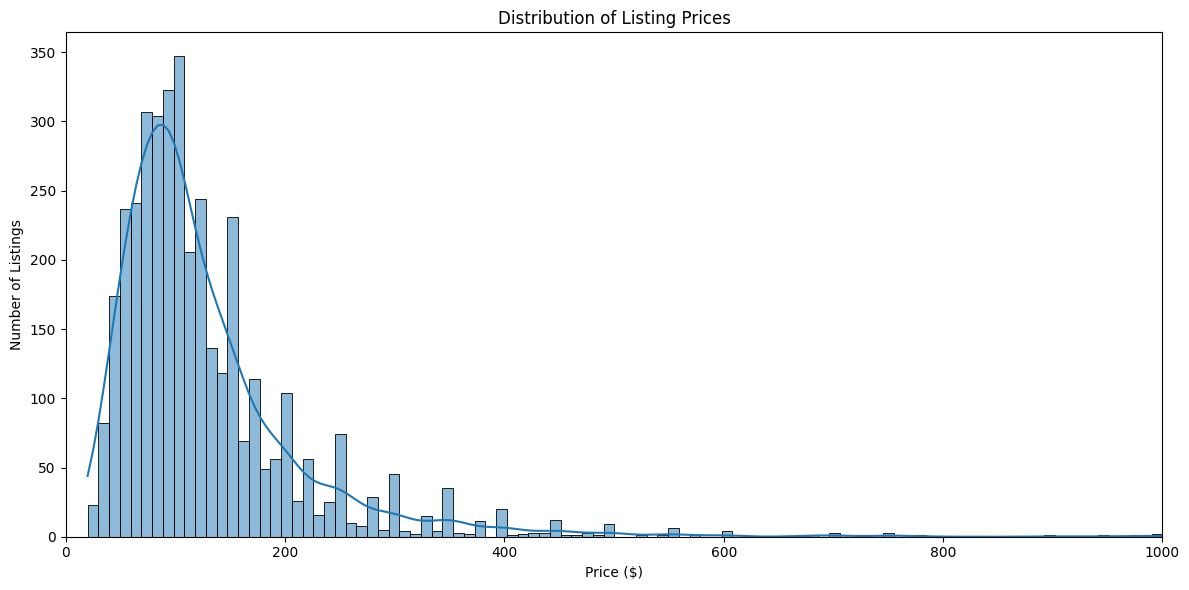

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert price from string to float after removing dollar signs and commas
listings['price'] = listings['price'].str.replace(',', '').str.replace('$', '').astype(float)

# Plot distribution of listing prices
plt.figure(figsize=(12, 6))
sns.histplot(listings['price'], bins=100, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.xlim(0, 1000)  # Limiting x-axis to 1000 for better visualization; there might be some high-priced outliers
plt.tight_layout()
plt.show()


Exploration of Categorical Variables
*   Visualize the distribution of room types.
*   Visualize the distribution of property types.
*   Visualize the distribution of listings across different neighborhoods.








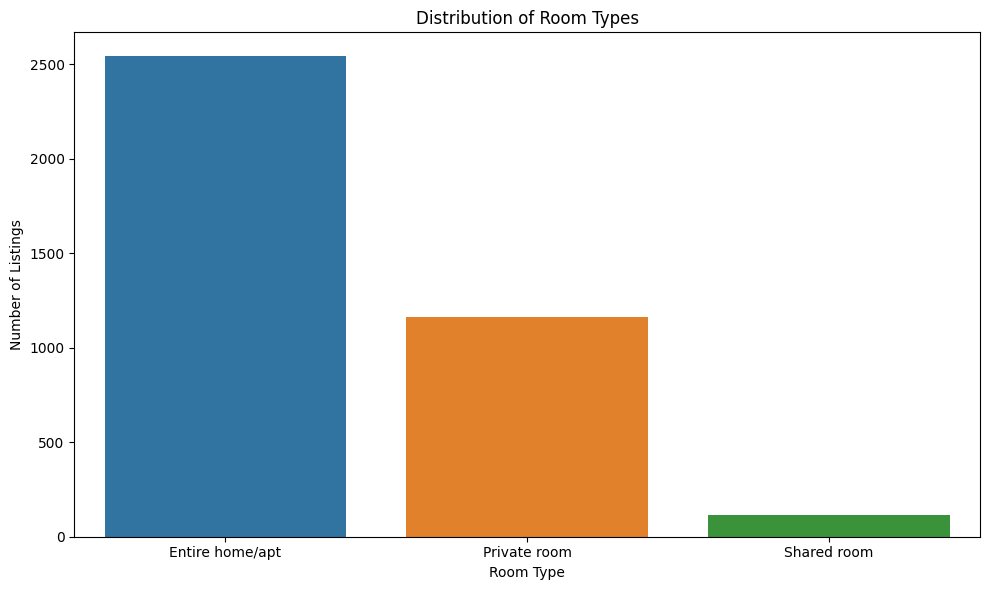

In [5]:
# Plot distribution of room types
plt.figure(figsize=(10, 6))
sns.countplot(data=listings, x='room_type', order=listings['room_type'].value_counts().index)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


The bar chart above displays the distribution of listings based on room types.

Next, we'll visualize the distribution of listings across different property types.

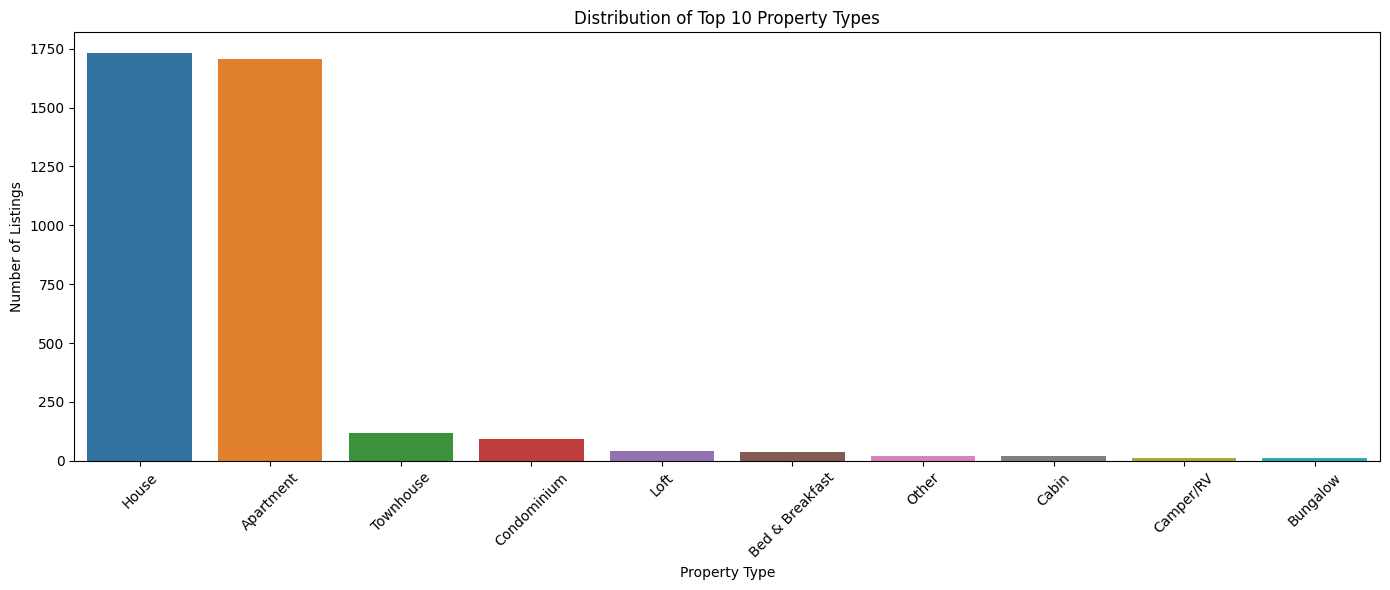

In [6]:
# Plot distribution of property types (considering top 10 most frequent types for clarity)
top_property_types = listings['property_type'].value_counts().head(10).index
filtered_listings = listings[listings['property_type'].isin(top_property_types)]

plt.figure(figsize=(14, 6))
sns.countplot(data=filtered_listings, x='property_type', order=filtered_listings['property_type'].value_counts().index)
plt.title('Distribution of Top 10 Property Types')
plt.xlabel('Property Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Next is to visualize the distribution of listings across different neighborhoods to see if there are certain areas with a higher concentration of Airbnb properties.

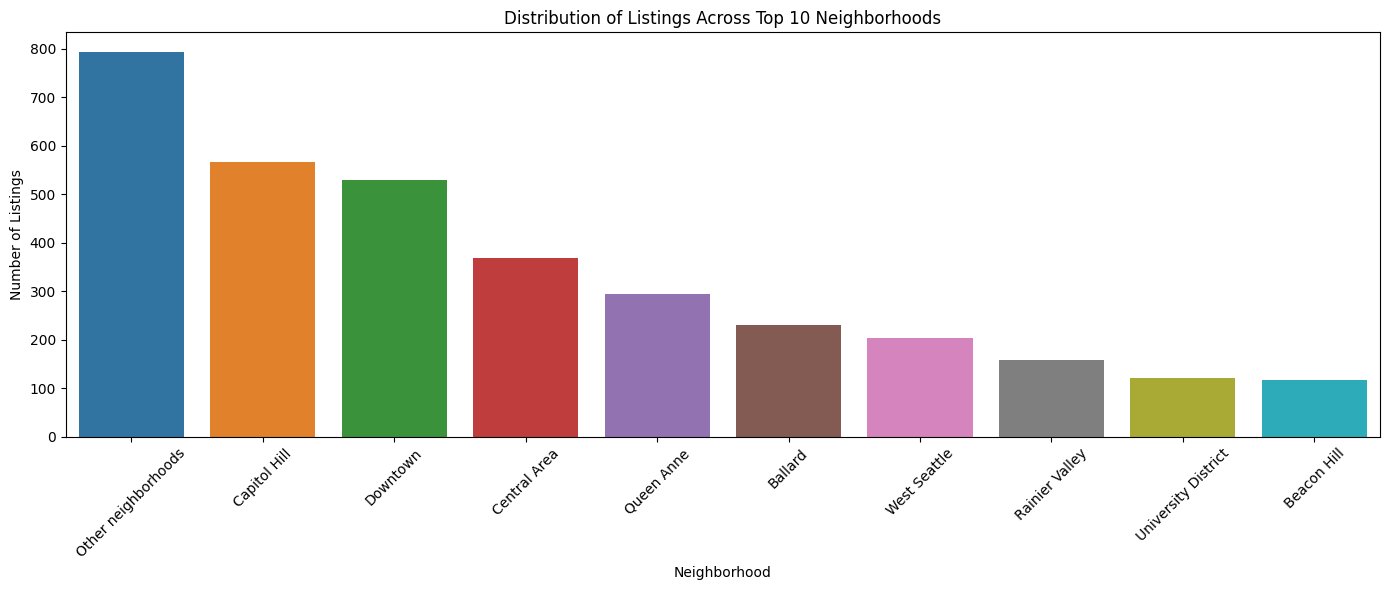

In [7]:
# Plot distribution of listings across neighborhoods (considering top 10 most frequent neighborhoods for clarity)
top_neighborhoods = listings['neighbourhood_group_cleansed'].value_counts().head(10).index
filtered_neighborhood_listings = listings[listings['neighbourhood_group_cleansed'].isin(top_neighborhoods)]

plt.figure(figsize=(14, 6))
sns.countplot(data=filtered_neighborhood_listings, x='neighbourhood_group_cleansed',
              order=filtered_neighborhood_listings['neighbourhood_group_cleansed'].value_counts().index)
plt.title('Distribution of Listings Across Top 10 Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Data Quality

We'll start by identifying the columns with missing data in the listings.csv dataset, as it's the most comprehensive one.

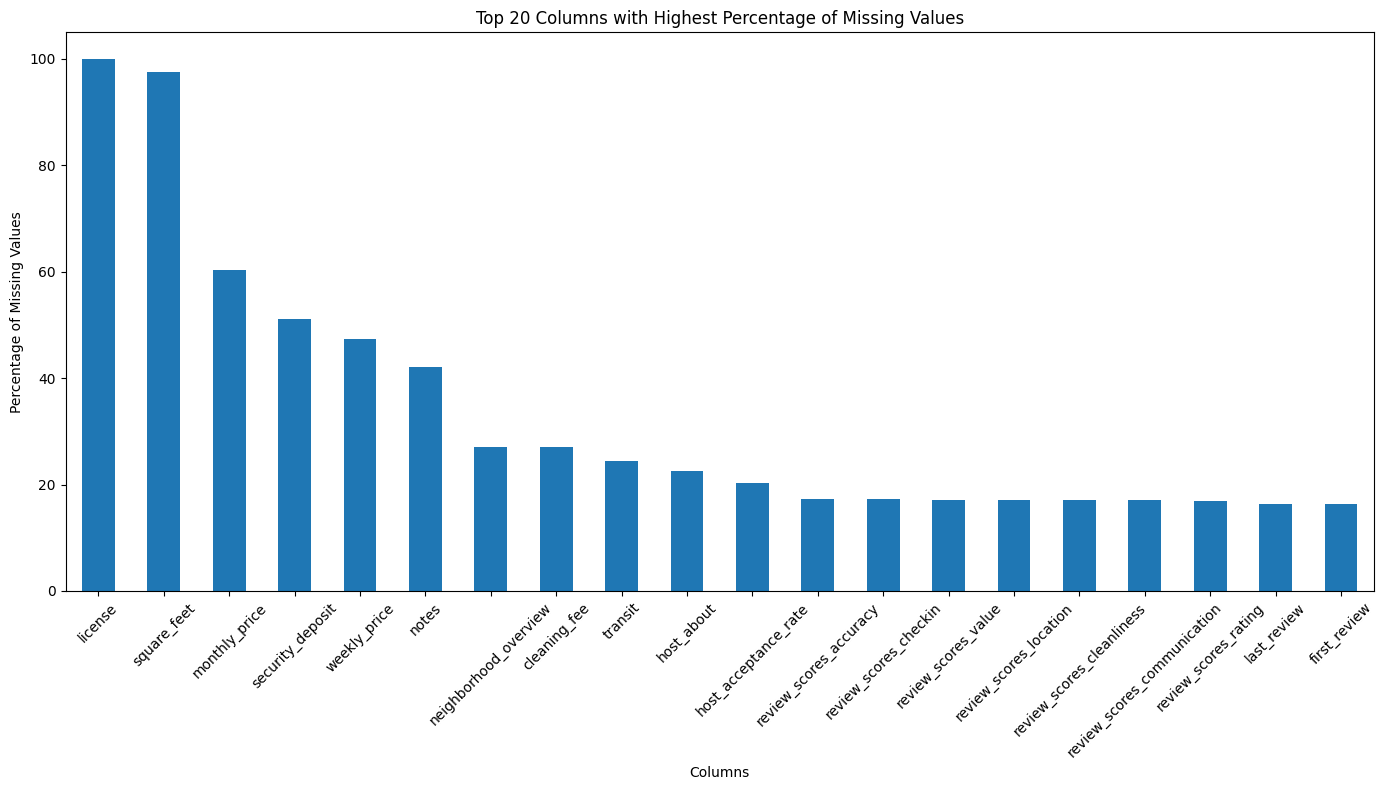

In [8]:
# Calculate the percentage of missing values for each column in the listings dataset
missing_values = listings.isnull().mean() * 100

# Filter columns with missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Plot the top 20 columns with the highest percentage of missing values
plt.figure(figsize=(14, 8))
missing_values.head(20).plot(kind='bar')
plt.title('Top 20 Columns with Highest Percentage of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Next, let's check for potential outliers in some key numerical columns, especially those that might influence our analysis of listing prices

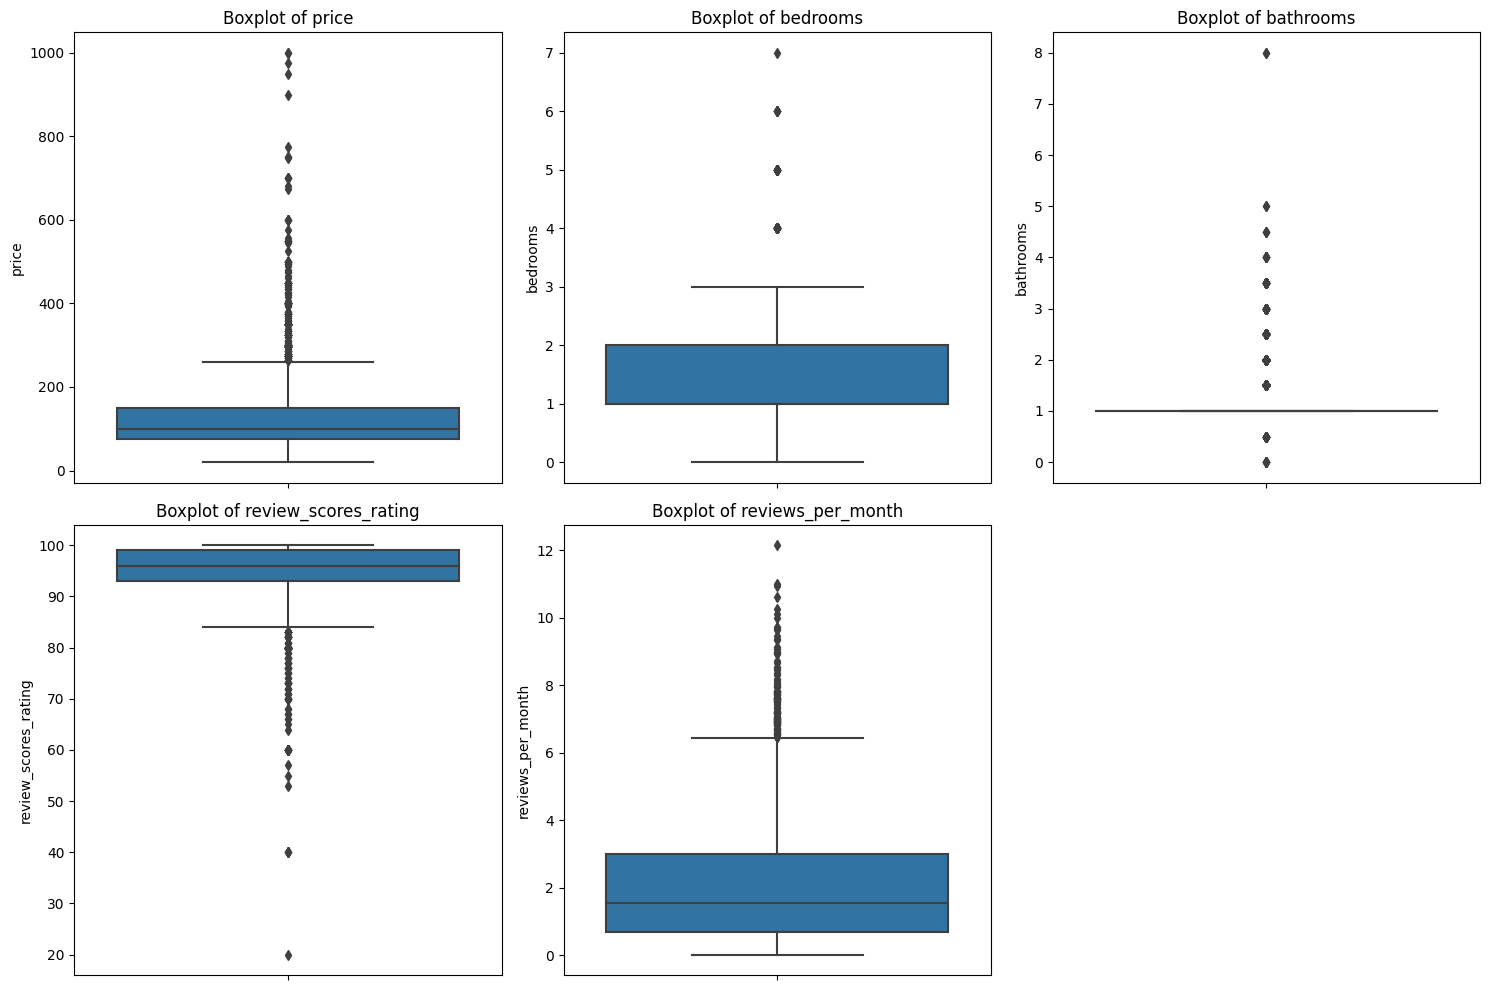

In [9]:
# Select key numerical columns to check for outliers
numerical_cols = ['price', 'bedrooms', 'bathrooms', 'review_scores_rating', 'reviews_per_month']

# Plot boxplots for selected columns
plt.figure(figsize=(15, 10))

for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, idx)
    sns.boxplot(y=listings[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


Checking for inconsistencies in categorical columns that might influence pricing and we'll look for any unexpected categories or inconsistencies in representation.

In [10]:
# Check data types of columns in the listings dataset
data_types = listings.dtypes

# Focus on key categorical columns for inconsistencies
key_categorical_cols = ['room_type', 'property_type', 'neighbourhood_group_cleansed']

categorical_values = {}
for col in key_categorical_cols:
    categorical_values[col] = listings[col].unique()

data_types, categorical_values


(id                                    int64
 listing_url                          object
 scrape_id                             int64
 last_scraped                         object
 name                                 object
                                      ...   
 cancellation_policy                  object
 require_guest_profile_picture        object
 require_guest_phone_verification     object
 calculated_host_listings_count        int64
 reviews_per_month                   float64
 Length: 92, dtype: object,
 {'room_type': array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object),
  'property_type': array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
         'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
         'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan],
        dtype=object),
  'neighbourhood_group_cleansed': array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
         'Central Area', 'University Dist

## Step 3. Data Preparation

 This phase involves several tasks such as Select data, Clean data, Construct Required Data,Integrate and format data to ensure that the data is ready for analysis and modeling.

1. Select data

here we'll select a subset of columns from the listings.csv

In [11]:
# Select relevant columns for analysis
selected_columns = [
    'id', 'property_type', 'room_type', 'bedrooms', 'bathrooms',
    'neighbourhood_group_cleansed', 'review_scores_rating', 'amenities', 'price'
]

selected_data = listings[selected_columns]

# Display the first few rows of the selected data
selected_data.head()


,id,property_type,room_type,bedrooms,bathrooms,neighbourhood_group_cleansed,review_scores_rating,amenities,price
0,241032,Apartment,Entire home/apt,1.0,1.0,Queen Anne,95.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0
1,953595,Apartment,Entire home/apt,1.0,1.0,Queen Anne,96.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0
2,3308979,House,Entire home/apt,5.0,4.5,Queen Anne,97.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0
3,7421966,Apartment,Entire home/apt,0.0,1.0,Queen Anne,NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0
4,278830,House,Entire home/apt,3.0,2.0,Queen Anne,92.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0


2. Clean Data

In [12]:
# Check for missing values in the selected data
missing_values_selected = selected_data.isnull().sum()
missing_values_selected


id                                0
property_type                     1
room_type                         0
bedrooms                          6
bathrooms                        16
neighbourhood_group_cleansed      0
review_scores_rating            647
amenities                         0
price                             0
dtype: int64

Let's start by imputing the missing values for property_type, bedrooms, and bathrooms. Then, we'll address the missing values in review_scores_rating.

In [13]:
# Impute missing values for property_type, bedrooms, and bathrooms
selected_data['property_type'].fillna(selected_data['property_type'].mode()[0], inplace=True)
selected_data['bedrooms'].fillna(selected_data['bedrooms'].median(), inplace=True)
selected_data['bathrooms'].fillna(selected_data['bathrooms'].median(), inplace=True)

# Create a binary flag for review_scores_rating
selected_data['reviewed'] = ~selected_data['review_scores_rating'].isnull()

# Check if missing values are addressed
missing_after_imputation = selected_data.isnull().sum()
missing_after_imputation


<ipython-input-13-b2e42d64c28e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['property_type'].fillna(selected_data['property_type'].mode()[0], inplace=True)
<ipython-input-13-b2e42d64c28e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['bedrooms'].fillna(selected_data['bedrooms'].median(), inplace=True)
<ipython-input-13-b2e42d64c28e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['bath

id                                0
property_type                     0
room_type                         0
bedrooms                          0
bathrooms                         0
neighbourhood_group_cleansed      0
review_scores_rating            647
amenities                         0
price                             0
reviewed                          0
dtype: int64

Handling Outliers

In [14]:
# Calculate IQR for the price column
Q1 = selected_data['price'].quantile(0.25)
Q3 = selected_data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = selected_data[(selected_data['price'] < lower_bound) | (selected_data['price'] > upper_bound)]

# Number of outliers and their percentage in the dataset
num_outliers = outliers.shape[0]
percentage_outliers = (num_outliers / selected_data.shape[0]) * 100

num_outliers, percentage_outliers



(246, 6.44316396018858)

In [15]:
# Cap prices at the upper bound for outliers
selected_data['price'] = selected_data['price'].clip(upper=upper_bound)

# Check if there are any listings with prices above the upper bound after capping
above_upper_bound = selected_data[selected_data['price'] > upper_bound].shape[0]

above_upper_bound


<ipython-input-15-6b2278ff9686>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['price'] = selected_data['price'].clip(upper=upper_bound)


0

Construct required data

In [16]:
# Construct num_amenities feature from the amenities column
selected_data['num_amenities'] = selected_data['amenities'].apply(lambda x: len(str(x).split(',')))

# Display the first few rows of the selected data with the new feature
selected_data[['id', 'amenities', 'num_amenities']].head()


<ipython-input-16-780bb440d42e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['num_amenities'] = selected_data['amenities'].apply(lambda x: len(str(x).split(',')))


,id,amenities,num_amenities
0,241032,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",10
1,953595,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",16
2,3308979,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",21
3,7421966,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",14
4,278830,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",13


## Step 4. Modeling

The main objectives of this phase are:
*   Select Modeling Technique: Decide on the type of model to use based on the problem at hand.
*   Generate Test Design: Set aside a portion of our data for model validation.
*   Build Model: Train the model using our selected dataset.
*   Assess Model: Evaluate the model's performance.



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for col in ['property_type', 'room_type', 'neighbourhood_group_cleansed']:
    le = LabelEncoder()
    selected_data[col] = le.fit_transform(selected_data[col])
    label_encoders[col] = le

# Split the data into training and test sets
X = selected_data.drop(columns=['id', 'price', 'amenities'])
y = selected_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


<ipython-input-17-35672949917d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = le.fit_transform(selected_data[col])
<ipython-input-17-35672949917d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = le.fit_transform(selected_data[col])
<ipython-input-17-35672949917d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

((3054, 8), (764, 8))

float64


<ipython-input-24-4bc8fbccc2ce>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = listings['price'].str.replace(',', '').str.replace('$', '').astype(float)


In [25]:
# Reconstructing the selected dataset and transformations

# Check the data type of the 'price' column
print(listings['price'].dtype)

# If the data type is not a string, convert it to a string first
if listings['price'].dtype != 'object':
    listings['price'] = listings['price'].astype(str)

# Then, remove commas and dollar signs and convert to float
listings['price'] = listings['price'].str.replace(',', '').str.replace('$', '').astype(float)
# # Convert price from string to float
# listings['price'] = listings['price'].str.replace(',', '').series.str.replace('$', '').astype(float)


# Impute missing values for property_type, bedrooms, and bathrooms
listings['property_type'].fillna(listings['property_type'].mode()[0], inplace=True)
listings['bedrooms'].fillna(listings['bedrooms'].median(), inplace=True)
listings['bathrooms'].fillna(listings['bathrooms'].median(), inplace=True)

# Create a binary flag for review_scores_rating
listings['reviewed'] = ~listings['review_scores_rating'].isnull()

# Handle outliers using IQR for the price column
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
listings['price'] = listings['price'].clip(upper=upper_bound)

# Select the relevant columns
selected_columns = [
    'id', 'property_type', 'room_type', 'bedrooms', 'bathrooms',
    'neighbourhood_group_cleansed', 'review_scores_rating', 'amenities', 'price'
]
selected_data = listings[selected_columns]

# Now, let's encode the categorical variables and split the data into training and test sets

label_encoders = {}
for col in ['property_type', 'room_type', 'neighbourhood_group_cleansed']:
    le = LabelEncoder()
    selected_data[col] = le.fit_transform(selected_data[col])
    label_encoders[col] = le

# Split the data into training and test sets
X = selected_data.drop(columns=['id', 'price', 'amenities'])
y = selected_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


float64


<ipython-input-25-40d1fc96cc0b>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = listings['price'].str.replace(',', '').str.replace('$', '').astype(float)
<ipython-input-25-40d1fc96cc0b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = le.fit_transform(selected_data[col])
<ipython-input-25-40d1fc96cc0b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

((3054, 6), (764, 6))

Encode categorical data

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['property_type', 'room_type', 'neighbourhood_group_cleansed']:
    le = LabelEncoder()
    selected_data[col] = le.fit_transform(selected_data[col])
    label_encoders[col] = le


<ipython-input-26-d1d1bf6f7517>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = le.fit_transform(selected_data[col])
<ipython-input-26-d1d1bf6f7517>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = le.fit_transform(selected_data[col])
<ipython-input-26-d1d1bf6f7517>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

Split Data

In [27]:
from sklearn.model_selection import train_test_split

X = selected_data.drop(columns=['id', 'price', 'amenities'])
y = selected_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training

In [29]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to your feature matrix
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now you can fit the RandomForestRegressor on the imputed data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_imputed, y_train)


# Drop rows with missing values from both X_train and y_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]

# Fit the RandomForestRegressor on the cleaned data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Model Evaluation

In [32]:
from sklearn.impute import SimpleImputer

# Create an imputer and fit it on the training data
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)

# Apply the imputer to your test feature matrix
X_test_imputed = imputer.transform(X_test)

# Now you can make predictions on the imputed test data
y_pred = rf.predict(X_test_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [33]:
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                        Feature  Importance
2                      bedrooms    0.523392
1                     room_type    0.125188
4  neighbourhood_group_cleansed    0.117812
5          review_scores_rating    0.113314
3                     bathrooms    0.079339
0                 property_type    0.040956


## Step 5. Evaluation

This phase focuses on assessing the model(s) built in the modeling phase to ensure that they meet the business objectives set out in the beginning. It's a checkpoint before proceeding to deployment.

### 1. Assessing Model Performance for Regression Task

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test are the true values and y_pred are the predicted values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")



Mean Absolute Error: 28.991565314685484
Mean Squared Error: 1618.217374682688
Root Mean Squared Error: 40.227072658629886
R-squared: 0.5730546735587765


### 2. Model Validation Technique

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Instantiate the RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation on the training data
scores = cross_val_score(model_rf, X_train, y_train, cv=5)

scores.mean()

from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_rf, X_train, y_train, cv=5)
print(f"Average score: {scores.mean()}")


Average score: 0.5993642623021548


## Step 6. Deployment

### Saving the Model

In [45]:
import joblib

# Save the model to a file
joblib.dump(model_rf, 'rf_model_filename.pkl')

# Later, to load the model back:
loaded_model = joblib.load('rf_model_filename.pkl')


### Deploying as an API

In [49]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the model
model = joblib.load('rf_model_filename.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Get data from POST request
    data = request.get_json(force=True)
    prediction = rf_model.predict([data['feature_array']])
    output = prediction[0]
    return jsonify(output)

if __name__ == '__main__':
    app.run(port=5000, debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


After building and evaluating a model, in deploymen phase the model is integrated into the business environment to start providing actionable results.